# Exploring Dandiset 001366: Surface Vessel Diameter and Pulsatility Analysis

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001366: "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification". The dataset contains microscopy movies of pial vessels in mice, aimed at analyzing vessel diameter and pulsatility.

Access the dataset at: https://dandiarchive.org/dandiset/001366/0.250324.1603

This notebook demonstrates:
- Loading data using the DANDI API
- Accessing NWB files and their metadata
- Visualizing vessel imaging data
- Working with time series image data

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt

## Loading Data from DANDI Archive

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Get the URL for our example NWB file
url = next(dandiset.get_assets_by_glob("sub-F15/sub-F15_ses-F15BC-19102023_image.nwb")).download_url

# Open the remote file and create NWB reader
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Examining Dataset Metadata
Let's look at key information about the experiment:

In [3]:
# Print basic session information
print("Subject ID:", nwb.subject.subject_id)
print("Subject Age:", nwb.subject.age)
print("Subject Species:", nwb.subject.species)
print("Subject Strain:", nwb.subject.strain)
print("\nSession ID:", nwb.session_id)
print("Session Start Time:", nwb.session_start_time)
print("\nExperiment Description:", nwb.experiment_description)
print("\nKeywords:", nwb.keywords[:])

Subject ID: F15
Subject Age: P9W/P16W
Subject Species: Mus musculus
Subject Strain: C57BL/6J

Session ID: F15BC-19102023
Session Start Time: 2023-10-19 02:00:00-04:00

Experiment Description: Vessel diameter and pulsatility measurement.

Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']


## Accessing and Visualizing Image Data
The dataset contains time-series images of pial vessels. Let's examine and visualize this data:

In [4]:
# Get the Movies ImageSeries
movies = nwb.acquisition['Movies']

# Print image series information
print("Frame Rate:", movies.rate, "fps")
print("Number of Frames:", movies.data.shape[0])
print("Image Dimensions:", movies.data.shape[1:])
print("Description:", movies.description)

Frame Rate: 54.47 fps
Number of Frames: 9553
Image Dimensions: (214, 132)
Description: 16-bit grayscale movie of a pial vessel


Let's visualize the first frame and a frame from the middle of the recording:

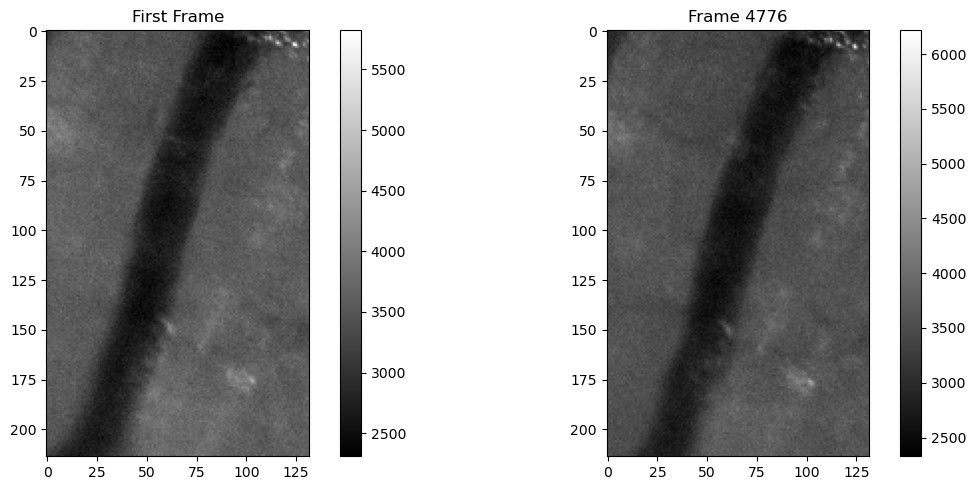

In [5]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first frame
im1 = ax1.imshow(movies.data[0], cmap='gray')
ax1.set_title('First Frame')
plt.colorbar(im1, ax=ax1)

# Plot middle frame
mid_frame = movies.data.shape[0] // 2
im2 = ax2.imshow(movies.data[mid_frame], cmap='gray')
ax2.set_title(f'Frame {mid_frame}')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

Let's also look at the temporal dynamics by plotting the mean intensity over time for a region of interest:

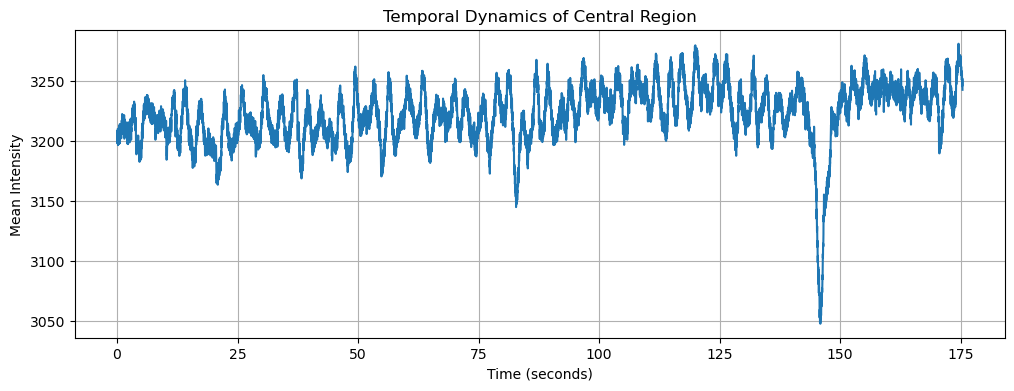

In [6]:
# Calculate mean intensity over time for the central region of the image
center_roi = movies.data[:, 
                        movies.data.shape[1]//4:3*movies.data.shape[1]//4,
                        movies.data.shape[2]//4:3*movies.data.shape[2]//4]
mean_intensity = np.mean(center_roi, axis=(1,2))

# Create time vector
time = np.arange(len(mean_intensity)) / movies.rate

# Plot mean intensity over time
plt.figure(figsize=(12, 4))
plt.plot(time, mean_intensity)
plt.xlabel('Time (seconds)')
plt.ylabel('Mean Intensity')
plt.title('Temporal Dynamics of Central Region')
plt.grid(True)
plt.show()

## Next Steps
This dataset enables various analyses including:
- Vessel diameter quantification
- Pulsatility analysis
- Comparison of different measurement approaches
- Temporal analysis of vessel dynamics

The provided imaging data can be further processed using techniques mentioned in the keywords, such as:
- Radon transform analysis
- Full width at half maximum measurements
- Custom image analysis pipelines

Don't forget to close the file when finished:

In [7]:
io.close()